# Import

In [1]:
import xdas as xd
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates

In [2]:
# -- Axes --
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["axes.axisbelow"] = False
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.ymargin"] = 0.1
plt.rcParams["font.size"] = 10
plt.rcParams["figure.dpi"] = 300
# -- Ticks and tick labels --
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["xtick.color"] = "k"
plt.rcParams["ytick.color"] = "k"
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["xtick.minor.size"] = 1
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["ytick.minor.size"] = 1
# -- Fonts --
plt.rcParams["font.size"] = 10
plt.rcParams["text.color"] = "k"
plt.rcParams["axes.labelcolor"] = "k"
plt.rcParams["axes.labelsize"] = 10
# -- Saving Options --
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = False
# -- Plot Styles --
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 0.1
plt.rcParams["lines.markeredgewidth"] = 0.1
plt.rcParams["figure.dpi"] = 300

mm = 1 / 25.4

# Paths and directories

In [ ]:
# file_path = f"./data/shot_das_1/jump_1.nc"
# file_path = f"./data/shot_das_1/jump_2.nc"
# file_path = f"./data/shot_das_1/shot_1.nc"
# file_path = f"./data/shot_das_1/shot_2.nc"
# file_path = f"./data/shot_das_1/shot_3.nc"
# file_path = f"./data/shot_das_1/shot_4.nc"
# file_path = f"./data/shot_das_1/shot_5.nc"
# file_path = f"./data/shot_das_1/shot_6.nc"
# file_path = f"./data/shot_das_1/shot_7.nc"
file_path = f"./data/shot_das_1/shot_8.nc"



# Read data

In [46]:
da = xd.open_mfdataarray(f"{file_path}")

In [47]:
da

<xdas.DataArray (time: 2000, distance: 263)>
VirtualStack: 2.0MB (float32)
Coordinates:
  * time (time): 2025-06-23T10:06:39.000 to 2025-06-23T10:06:40.999
  * distance (distance): 45.000 to 307.000

# First plot raw  (just mean removal)

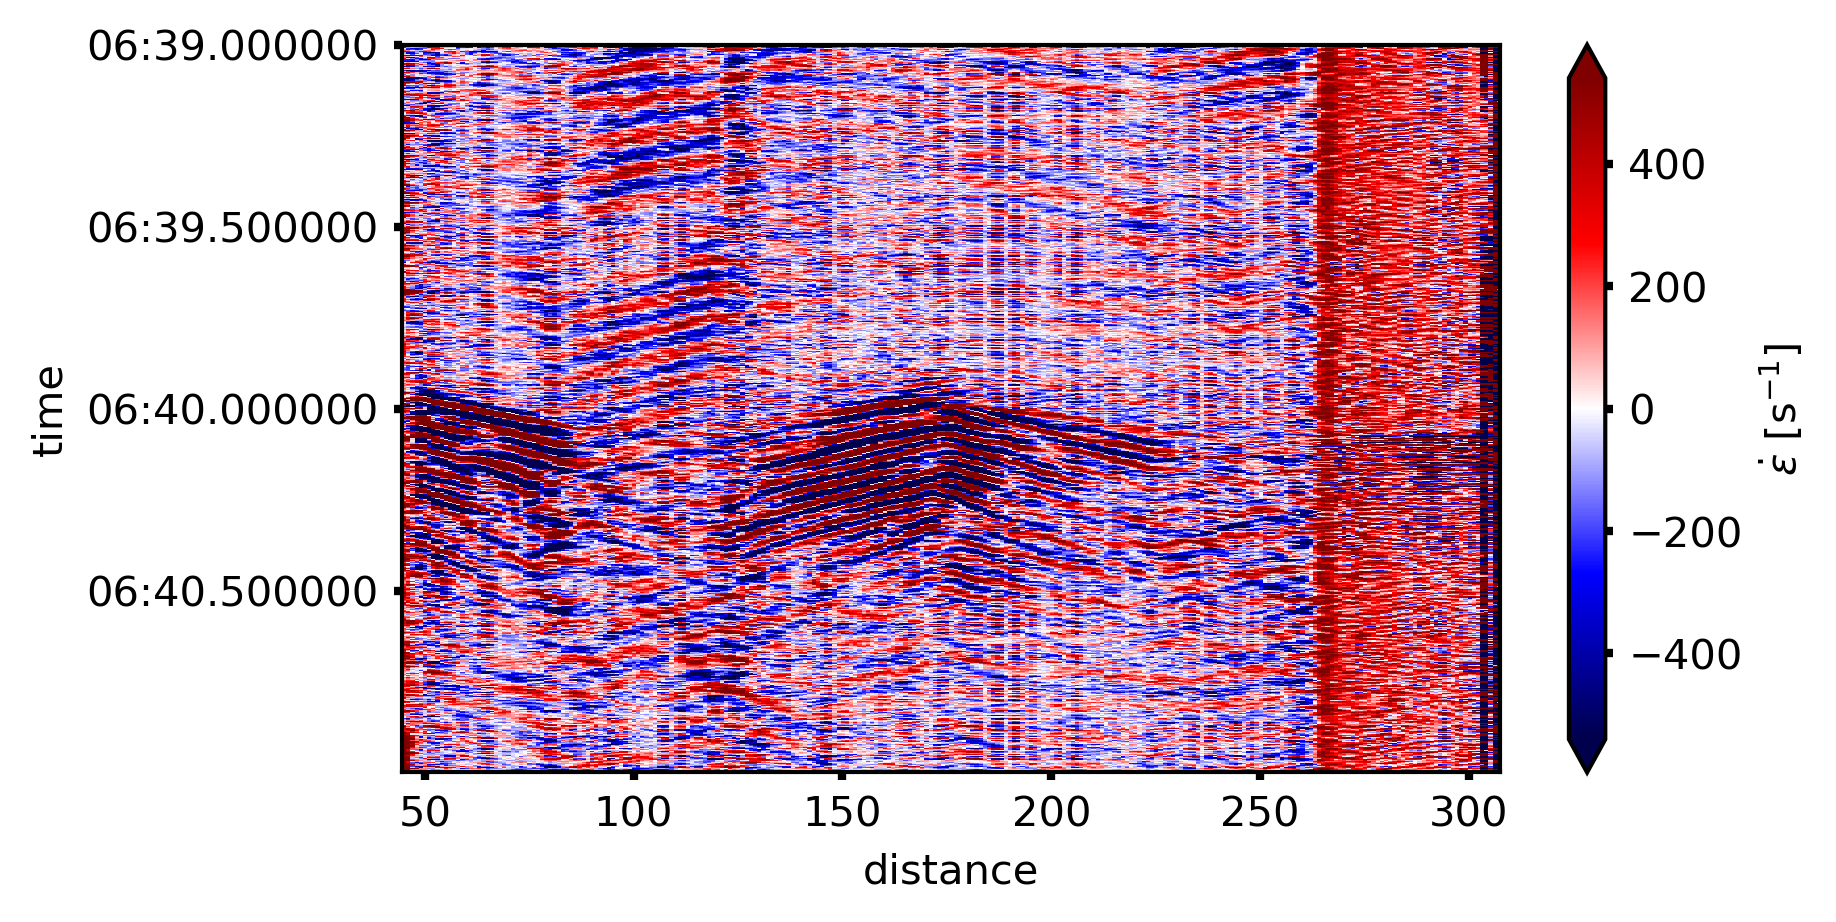

In [48]:
vlim = np.nanpercentile(np.abs(da.values), 90)
fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(150*mm, 80*mm),
    dpi=300
)
ax = axes
da.plot(robust=True,
    yincrease=False,
    vmin=-vlim, vmax=vlim,
    ax=ax, 
    cmap="seismic", 
    cbar_kwargs={
        "label": r"$\dot{\varepsilon}$ [s$^{-1}$]",
    })
plt.show()

# Data selection

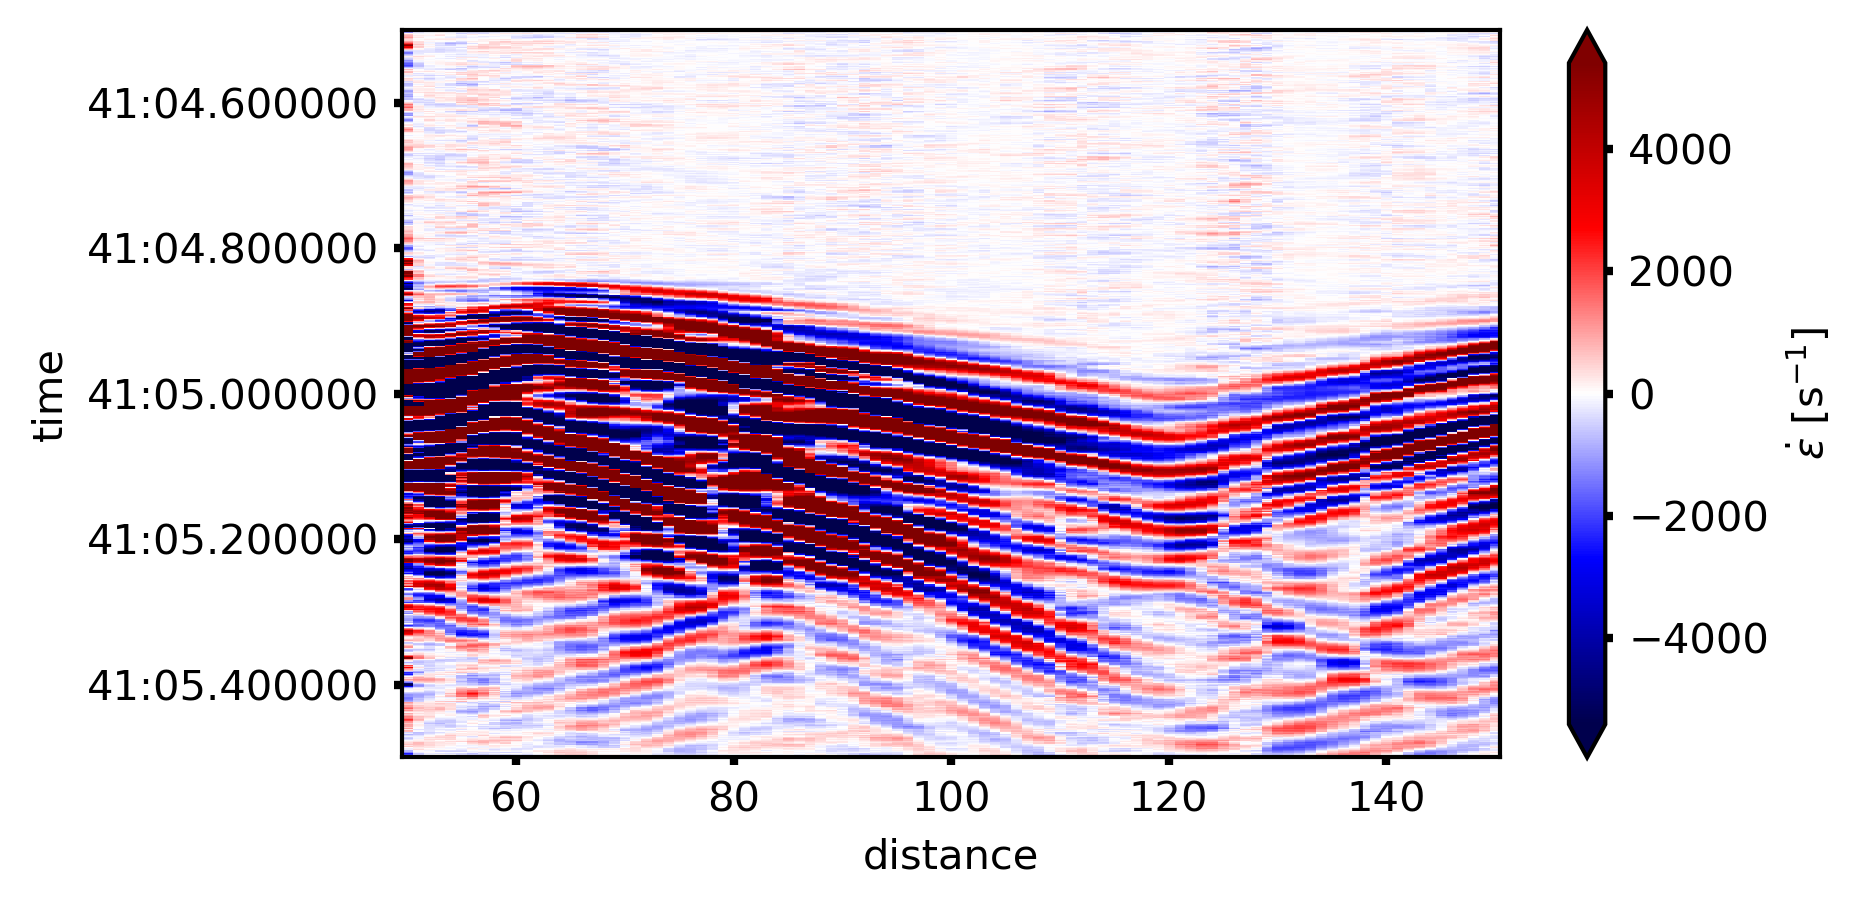

In [ ]:
# Time selection (fmt "YYYY-MM-DDTHH:MM:SS.sss")
starttime = "2025-06-23T10:11:18.000"
endtime = "2025-06-23T10:11:19.000"
# Distance selection (in meters)
startdist = 50.0
enddist = 150.0

da_sel = da.sel(
    time=slice(starttime, endtime),
    distance=slice(startdist, enddist),
)

# Plot
vlim = np.nanpercentile(np.abs(da_sel.values), 90)
fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(150*mm, 80*mm),
    dpi=300
)
ax = axes
da_sel.plot(robust=True,
    yincrease=False,
    vmin=-vlim, vmax=vlim,
    ax=ax, 
    cmap="seismic", 
    cbar_kwargs={
        "label": r"$\dot{\varepsilon}$ [s$^{-1}$]",
    })
plt.show()

# Plot single traces very N receivers

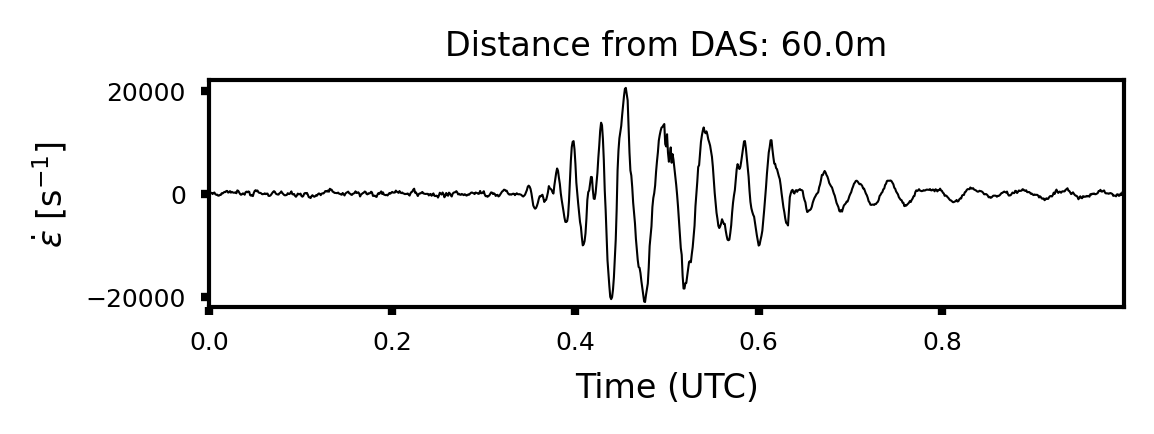

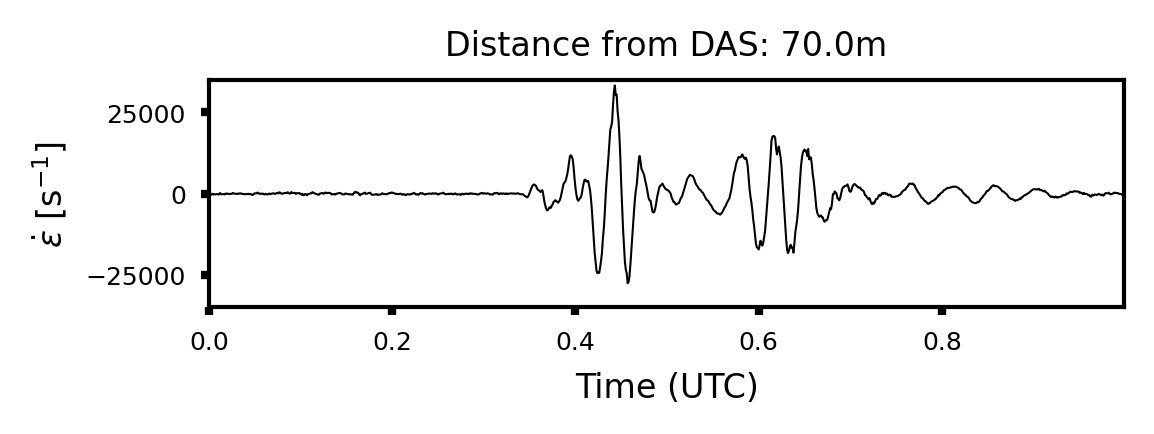

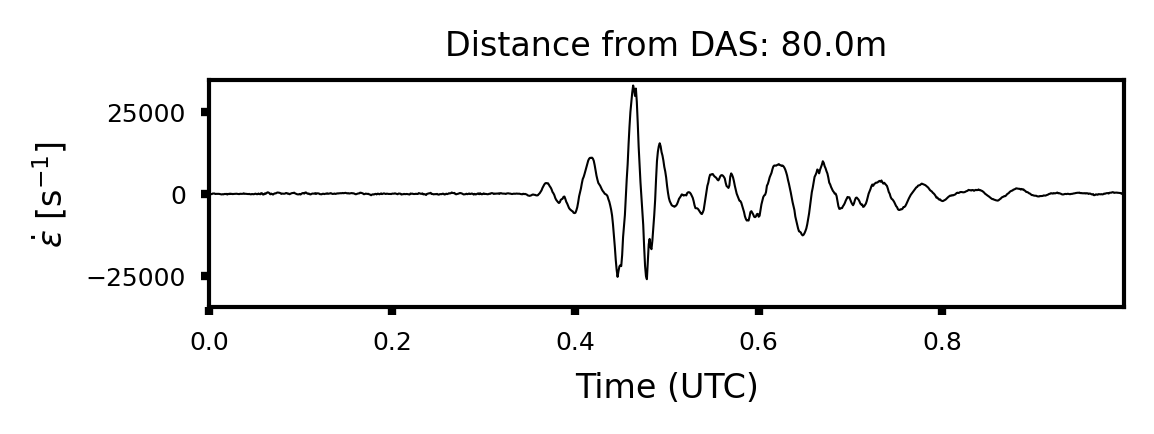

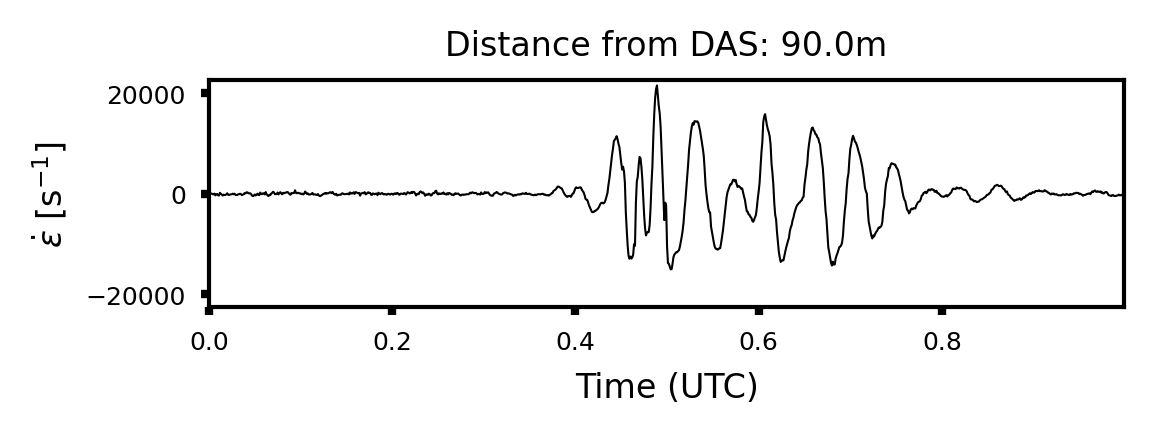

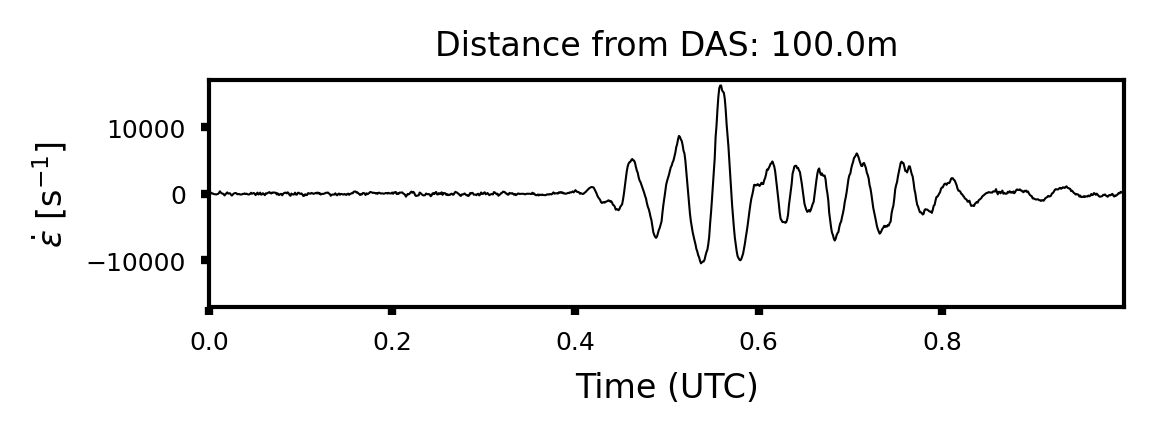

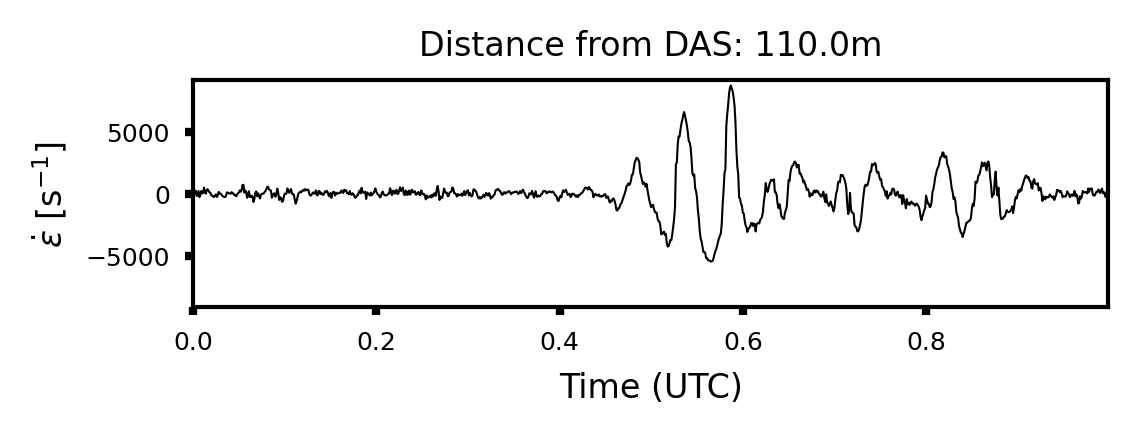

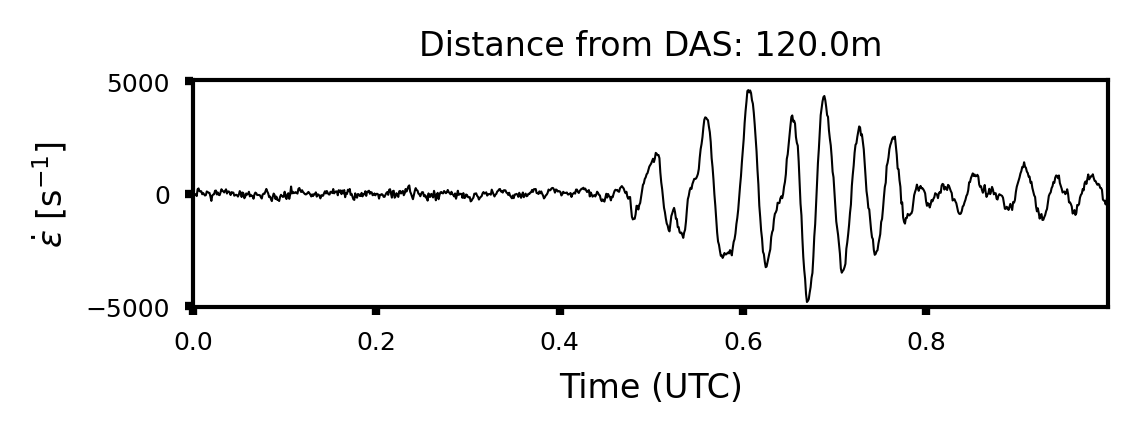

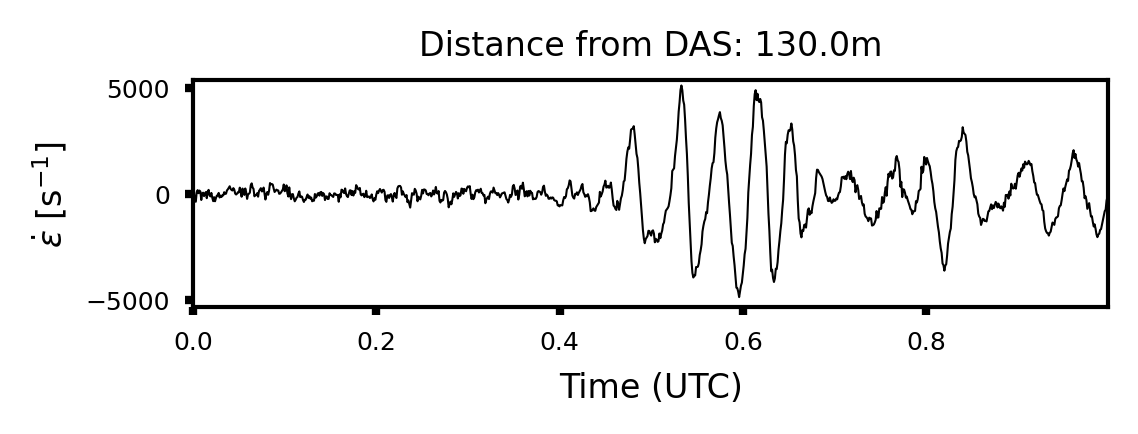

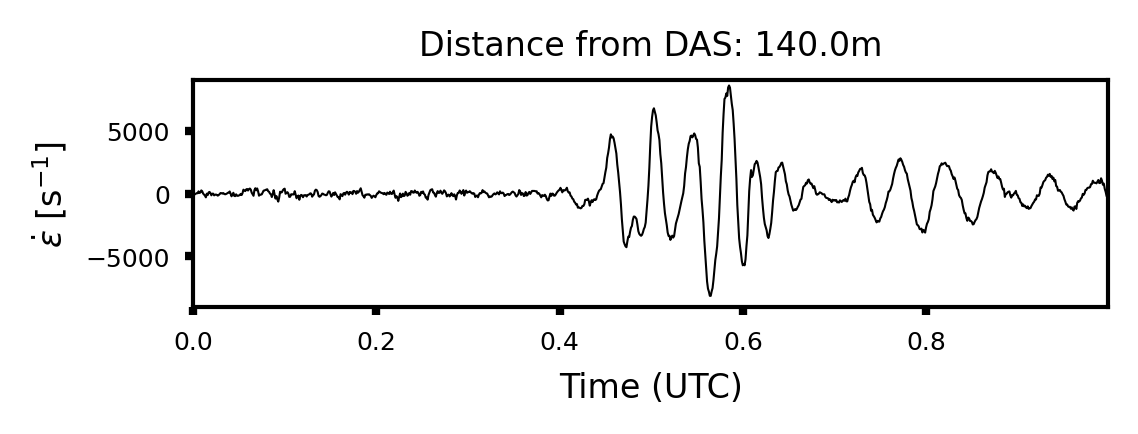

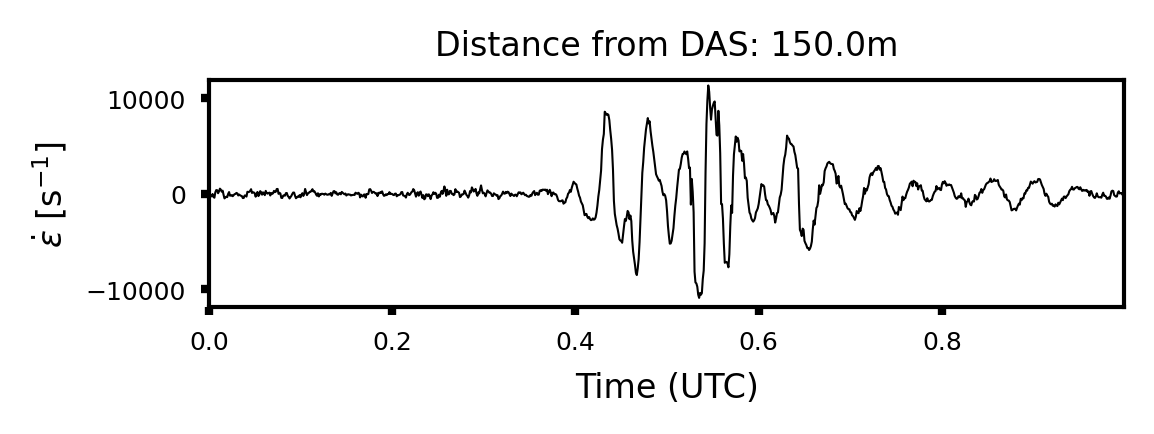

In [8]:
N = 10
for ch, dist in enumerate(da_sel["distance"]):
    if (ch % N == 0) & (ch != 0):
        trace = da_sel.isel(distance=ch)
        time_sec = (trace["time"].values - trace["time"].values[0]) / np.timedelta64(1, "s")
        maxamp = np.max(np.abs(trace.values))
        ylim = maxamp + maxamp * 0.05
        plt.figure(
            figsize=(100*mm, 25*mm),
        )
        plt.plot(time_sec, trace, "k", lw=0.5)
        plt.ylim([-ylim, ylim])
        plt.xlabel("Time (UTC)", fontsize=8)
        plt.ylabel(r"$\dot{\varepsilon}$ [s$^{-1}$]", fontsize=8)
        plt.title(f"Distance from DAS: {np.round(trace['distance'].values, 1)}m", fontsize=8)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.xlim([np.min(time_sec), np.max(time_sec)])
        plt.show()